[View in Colaboratory](https://colab.research.google.com/github/karangautam/machine_learning_examples/blob/master/Fruits_360.ipynb)

In [3]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  3 14:37 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [7]:
# List available datasets.
!kaggle datasets list

ref                                                             title                                     size  lastUpdated          downloadCount  
--------------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  
stackoverflow/stack-overflow-2018-developer-survey              Stack Overflow 2018 Developer Survey      20MB  2018-05-15 16:59:54            538  
jameslko/gun-violence-data                                      Gun Violence Data                         34MB  2018-04-15 06:18:09           5659  
donorschoose/io                                                 Data Science For Good: DonorsChoose.org    1GB  2018-05-14 19:26:30           3902  
moltean/fruits                                                  Fruits 360 dataset                       198MB  2018-05-26 08:05:33           3817  
goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics  Insightful & Vast USA Statistics          

In [8]:
!kaggle datasets list -s fruit

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                              Fruits 360 dataset                                 198MB  2018-05-26 08:05:33           3817  
cdc/brfss-20012010                                          BRFSS 2001-2010                                      4GB  2017-08-24 00:32:38            323  
fivethirtyeight/the-ultimate-halloween-candy-power-ranking  The Ultimate Halloween Candy Power Ranking           5KB  2017-10-31 18:29:10           1106  
cdc/behavioral-risk-factor-surveillance-system              Behavioral Risk Factor Surveillance System           3GB  2017-08-24 00:16:13            809  
rajanand/key-indicators-of-annual-health-survey             Health Ana

In [9]:
!kaggle datasets download -d moltean/fruits --force

fruits.zip: Downloaded 193MB of 193MB to /content/.kaggle/datasets/moltean/fruits


In [10]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/datasets/moltean/fruits"]).decode("utf8"))




fruits-360_dataset_2018_05_26.zip
fruits.zip



In [0]:
#!unzip -f "../content/.kaggle/datasets/moltean/fruits/fruits.zip"
import zipfile
zip_ref = zipfile.ZipFile("../content/.kaggle/datasets/moltean/fruits/fruits-360_dataset_2018_05_26.zip", "r")
zip_ref1 = zipfile.ZipFile("../content/.kaggle/datasets/moltean/fruits/fruits.zip", "r")
zip_ref.extractall("../content/.kaggle/datasets/moltean/fruits")
zip_ref1.extractall("../content/.kaggle/datasets/moltean/fruits")
zip_ref.close()
zip_ref1.close()

In [17]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/datasets/moltean/fruits"]).decode("utf8"))


fruits-360
fruits-360_dataset_2018_05_26.zip
fruits.zip



In [18]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/datasets/moltean/fruits/fruits-360"]).decode("utf8"))


LICENSE
papers
readme.md
test-multiple_fruits
Training
Validation



In [0]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.layers import Input, Lambda, Dense, Flatten,BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [0]:
%matplotlib inline

In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 128

In [0]:
train_path = '../content/.kaggle/datasets/moltean/fruits/fruits-360/Training'
valid_path = '../content/.kaggle/datasets/moltean/fruits/fruits-360/Validation'


In [0]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')

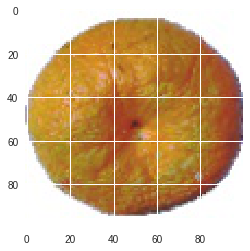

In [65]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [0]:
for layer in resnet.layers:
  layer.trainable = False

In [0]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
x = Dense(1000, activation='relu')(x)
x= BatchNormalization()(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [83]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [86]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 10657 images belonging to 64 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Cantaloupe 1': 16, 'Cantaloupe 2': 17, 'Carambula': 18, 'Cherry 1': 19, 'Cherry 2': 20, 'Cherry Rainier': 21, 'Clementine': 22, 'Cocos': 23, 'Dates': 24, 'Granadilla': 25, 'Grape Pink': 26, 'Grape White': 27, 'Grape White 2': 28, 'Grapefruit Pink': 29, 'Grapefruit White': 30, 'Guava': 31, 'Huckleberry': 32, 'Kaki': 33, 'Kiwi': 34, 'Kumquats': 35, 'Lemon': 36, 'Lemon Meyer': 37, 'Limes': 38, 'Litchi': 39, 'Mandarine': 40, 'Mango': 41, 'Maracuja': 42, 'Nectarine': 43, 'Orange': 44, 'Papaya': 45, 'Passion Fruit': 46, 'Peach': 47, 'Peach Flat': 48, 'Pear': 49, 'Pear Abate': 50, 'Pear Monster': 51, 'Pear Williams': 52, 'Pepino': 53, 'Pin

In [87]:
# should be a strangely colored image (due to VGG weights being BGR)
'''
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break
'''

'\nfor x, y in test_gen:\n  print("min:", x[0].min(), "max:", x[0].max())\n  plt.title(labels[np.argmax(y[0])])\n  plt.imshow(x[0])\n  plt.show()\n  break\n'

In [88]:
# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)


Found 31688 images belonging to 64 classes.
Found 10657 images belonging to 64 classes.


In [90]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=2
#  steps_per_epoch=len(image_files) // batch_size,
#  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/2
248/248 [==============================] - 612s 2s/step - loss: 0.0249 - acc: 0.9905 - val_loss: 1.9555 - val_acc: 0.6126
Epoch 2/2
248/248 [==============================] - 607s 2s/step - loss: 0.0256 - acc: 0.9893 - val_loss: 1.9175 - val_acc: 0.6295


In [0]:
img_width, img_height = 224, 224 # we set the img_width and img_height according to the pretrained models we are

batch_size = 16

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [94]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 31688 images belonging to 64 classes.
Found 10657 images belonging to 64 classes.


In [0]:
#import inception with pre-trained weights. do not include fully #connected layers
inception_base = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(64, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

In [0]:
from keras import optimizers
inception_transfer.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=['accuracy'])


In [103]:
inception_transfer.fit_generator(
    train_generator,
    epochs=2, shuffle = True, verbose = 1, validation_data = validation_generator)


Epoch 1/2
1980/1981 [============================>.] - ETA: 0s - loss: 0.0683 - acc: 0.9846

1981/1981 [==============================] - 1159s 585ms/step - loss: 0.0683 - acc: 0.9846 - val_loss: 0.0458 - val_acc: 0.9860
Epoch 2/2
 327/1981 [===>..........................] - ETA: 14:12 - loss: 0.0483 - acc: 0.9858

1980/1981 [============================>.] - ETA: 0s - loss: 0.0361 - acc: 0.9885

1981/1981 [==============================] - 1146s 579ms/step - loss: 0.0361 - acc: 0.9885 - val_loss: 0.0158 - val_acc: 0.9948
